# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Esse projeto, proposto por uma instituição financeira, visa entender os dados de renda de seus clientes e evitar riscos.

Vamos usar dados dos clientes para fazer previsões e tentar entender oque leva uma pessoa ser um bom ou mal cliente</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">Fontes: CSV

Coleta: Os dados são enviados via CSV

Entregável: Previsão de renda</span>


### Dicionário de dados

<span style="color:red">Visão Geral de Dados</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                      | Object|
| id_cliente              |  Número único do cliente                                   | Int|
| sexo                    |  Sexo do cliente                                      | Object |
| posse_de_veiculo        |  Se o cliente possui veiculo                                     | Bool|
| posse_de_imovel         |  Se o cliente possui imovel                                    | Bool|
| qtd_filhos              |  Quantidade de filhos do cliente                                | Int|
| tipo_renda              |  Tipo de renda do cliente                         | Object|
| educacao                |  Nível Educacional                                | Object|
| estado_civil            |  Estado Civil                       | Object|
| tipo_residencia         |  Tipo de residência                           | Object|
| idade                   |  Idade                              | Int|
| tempo_emprego           |  Tempo em que está empregado          | Float|
| qt_pessoas_residencia   |  Quantidade de pessoas que residem na casa                      | Float|
| renda                   |  Quantidade de renda                        | Float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

Pacotes:

# ETL:

Pandas

Numpy

-----------------------

# Análise Gráfica:

matplotlib.pyplot

seaborn

Ydata_profiling

-----------------------

# Modelo de previsão

sklearn

In [181]:
!pip install ydata_profiling

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">Vamos importar os dados e visualizar a nossa base</span>


In [209]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

<ipython-input-209-a80cf8f17e7e>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [197]:
renda = pd.read_csv('renda.csv')

In [198]:
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [185]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 44.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [186]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">O código acima salva a nossa variável "prof" em HTML para que possamos ter uma visualização melhor</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">Vamos utilizar da análise bivariada para entender associação, correlação ou efeitos causais entre as variáveis.</span>


[]

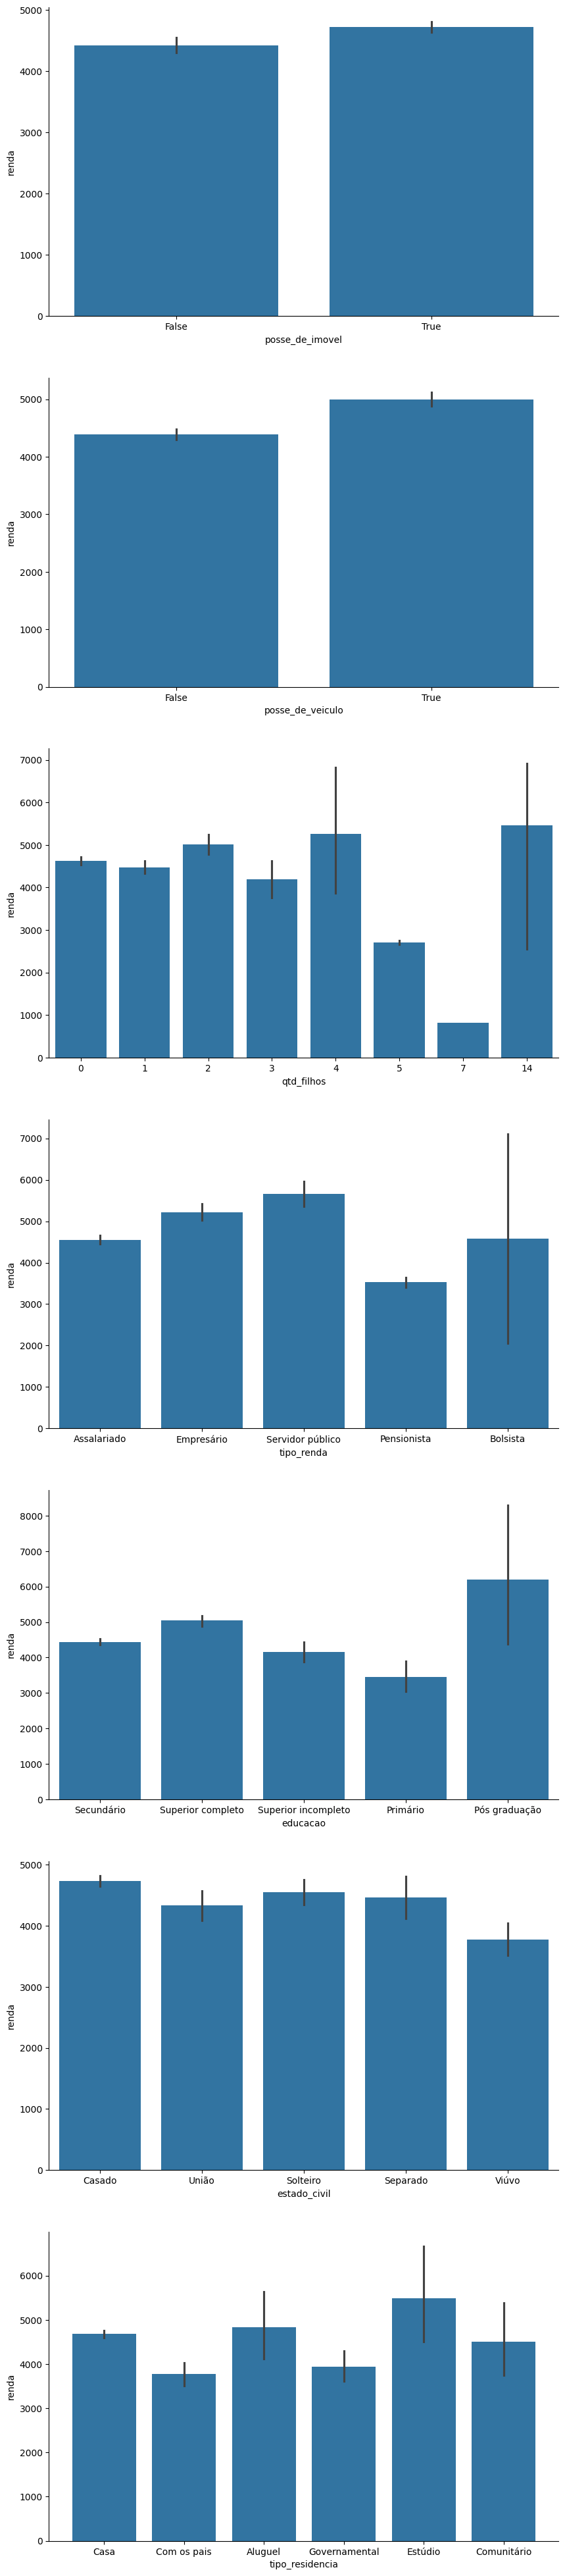

In [187]:
fig, ax = plt.subplots(7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
sns.despine()
plt.plot()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">Vamos utilizar da Árvore de Decisão para fazer a nossas previsões</span>


In [199]:
renda.drop(columns=['data_ref'], axis=1, inplace=True)


In [200]:
renda.isna().sum()


,0
Unnamed: 0,0
index,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0


In [201]:
renda.dropna(inplace=True)

In [202]:
renda = pd.get_dummies(renda, drop_first=True)
renda.head()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,8682,False,True,1,36,3.575342,3.0,False,3369.24,...,False,False,False,False,False,True,False,False,False,False
1,1,12830,True,True,0,42,0.860274,2.0,False,6096.14,...,False,False,False,False,False,True,False,False,False,False
2,2,2885,True,True,2,31,8.065753,4.0,False,5658.98,...,False,False,False,False,False,True,False,False,False,False
3,3,16168,True,False,0,50,1.208219,2.0,False,7246.69,...,False,False,False,False,False,True,False,False,False,False
4,4,12438,False,False,0,52,13.873973,2.0,False,4017.37,...,False,False,False,False,False,True,False,False,False,False


In [203]:
def replace_outliers_with_std(renda):
    for col in renda.select_dtypes(include='number').columns:
        q1 = renda[col].quantile(0.25)
        q3 = renda[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identificar outliers
        outliers = (renda[col] < lower_bound) | (renda[col] > upper_bound)

        # Substituir outliers pelo desvio padrão da coluna
        renda.loc[outliers, col] = renda[col].std()

    return renda

# Aplicando a função ao DataFrame
renda = replace_outliers_with_std(renda)

<ipython-input-203-074578c5febe>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4340.440719650363' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  renda.loc[outliers, col] = renda[col].std()
<ipython-input-203-074578c5febe>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4792.750858190471' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  renda.loc[outliers, col] = renda[col].std()
<ipython-input-203-074578c5febe>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8043582319214895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  renda.loc[outliers, col] = renda[col].std()
<ipython-input-203-074578c5febe>:13: FutureWa

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [204]:
X = renda.drop(['renda'], axis=1).copy()
y= renda['renda']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


In [210]:
modelo_1 = RandomForestRegressor(max_depth=2)
modelo_2 = RandomForestRegressor(max_depth=8)

modelo_1.fit(X_train, y_train)
modelo_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

In [211]:
mse1 = modelo_1.score(X_test, y_test)
mse2 = modelo_2.score(X_test, y_test)

print(f'O mse do modelo 1 é {mse1}')
print(f'O mse do modelo 2 é {mse2}')

O mse do modelo 1 é 0.10073734237319876
O mse do modelo 2 é 0.18361125351930363


In [212]:
modelo_2 = RandomForestRegressor (max_depth=8, min_samples_leaf=20)
modelo_2.fit(X_train, y_train)
mse1 = modelo_2.score(X_test, y_test)
mse1

0.17543355976876351

In [213]:
r2s = []
i_indicador = []
j_indicador = []

for i in range(1, 9):
    for j in range (1, 9):
        modelo_2 = RandomForestRegressor(max_depth = i, min_samples_leaf=j, random_state=42)
        modelo_2.fit(X_train, y_train)
        r2_1 = modelo_2.score(X_test, y_test)
        r2s.append(r2_1)
        i_indicador.append(i)
        j_indicador.append(j)

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.051091,0.051091,0.051091,0.051091,0.051091,0.051091,0.051091,0.051091
2,0.099592,0.099592,0.099592,0.099592,0.099592,0.099592,0.099592,0.099592
3,0.121140,0.121192,0.121371,0.121371,0.121559,0.121607,0.121677,0.121659
4,0.137123,0.137110,0.137094,0.137269,0.137389,0.137329,0.137514,0.137541
5,0.149472,0.149352,0.149332,0.149421,0.149681,0.149329,0.149564,0.149818
6,0.159002,0.159271,0.159878,0.159494,0.159364,0.159156,0.159239,0.159580
7,0.169565,0.170365,0.170997,0.170556,0.170254,0.169313,0.169735,0.169741
8,0.182111,0.181793,0.182471,0.180972,0.181304,0.179961,0.179826,0.179822


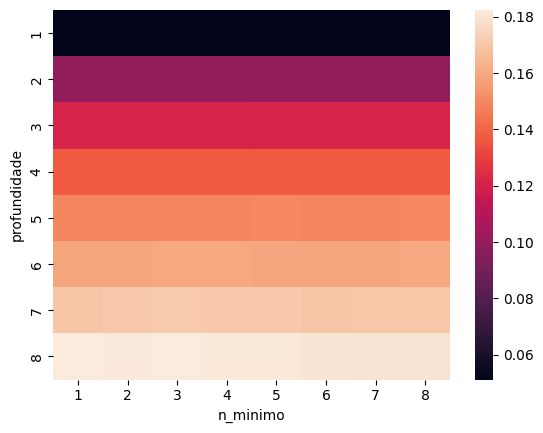

In [214]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': i_indicador, 'n_minimo': j_indicador})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'))
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

In [215]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
}

# Crie o modelo
rf = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, random_state=42)

# Realize o grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

In [216]:
print(best_model)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, n_estimators=500,
                      random_state=42)


In [217]:
modelo_final = RandomForestRegressor(max_depth = 7, min_samples_leaf=7, n_estimators=500, random_state=42)

modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">No nosso modelo, foi necessário retirar os outliers e substituir pelo desvio padrão da coluna respectiva na qual havia o outlier, foi feito todo o processo de limpeza e remoção de linhas duplicadas e transformar todas as variaveis categorias em 'dummies'. Após isso, começamos a treinar o modelo usando random forest e com ajustes de alguns parammetros, conseguimos no melhor modelo possível para esse conjunto de daos, no qual um r² de 17%</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [218]:
mse = mean_squared_error(y_test, y_pred)
mse

4974926.582706436

In [219]:
r2_train = modelo_final.score(X_train, y_train)
r2_test = modelo_final.score(X_test, y_test)

print(r2_train)
print(r2_test)

0.2527283077258573
0.17137592775141253
